# **<center><b>Caso Titanic - KNN Classification</b></center>**

##<h2><b>1. Preparacion del Modelo</b></h2>

### <center><h2><b>1.1. Montar Titanic Dataset</b></h2></center>

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###<h2><b>1.2. Importar Librerias Python</b></h2>

In [4]:
# Import Titanic DataSet
from load_titanic_dataset import load_titanic

# Import ml sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    r2_score
)

# Import Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import saving ml model
import joblib
import pandas as pd
import numpy as np

### <h2><b>1.3. Cargar la data de Titanic</b></h2>


In [5]:
# Load Titanic dataset
dataset = load_titanic('/content/titanic.csv')
X = dataset.data
y = dataset.target
print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features")

Dataset loaded: 891 samples, 9 features


##<h2><b>2. Entrenamiento del modelo</b></h2>

### <h2><b>2.1. Divisón entre Test y Training Data</b></h2>

In [6]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Train set size: 712 samples
Test set size: 179 samples


### <h2><b>2.2. Definir Hyperparametros</b></h2>

In [7]:
print("Normalizing features to [0, 1] range...")

# Normalize features to [0, 1] range
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature normalization completed")

# Create and train K-NN model
print("Creating K-NN classifier (n_neighbors=3, metric=euclidean)")
model = KNeighborsClassifier(n_neighbors=3, p=2, weights='uniform')

# Train the model
print("Training model...")
model.fit(X_train, y_train)
print("Model training completed")

Normalizing features to [0, 1] range...
Feature normalization completed
Creating K-NN classifier (n_neighbors=3, metric=euclidean)
Training model...
Model training completed


### <h2><b>2.3. Realización de Predicciones</b></h2>


In [8]:
# Make predictions
print("Making predictions on test set...")
y_pred = model.predict(X_test)

# Evaluation metrics
print("\n" + classification_report(y_test, y_pred))

Making predictions on test set...

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



##<h2><b>3. Grafica de entrenamiento</b></h2>

### <h2><b>3.1. Gráfico Matriz de Confusión</b></h2>

Generating confusion matrix...
Confusion Matrix:
[[89 16]
 [23 51]]
Confusion matrix saved as 'confusion_matrix.png'


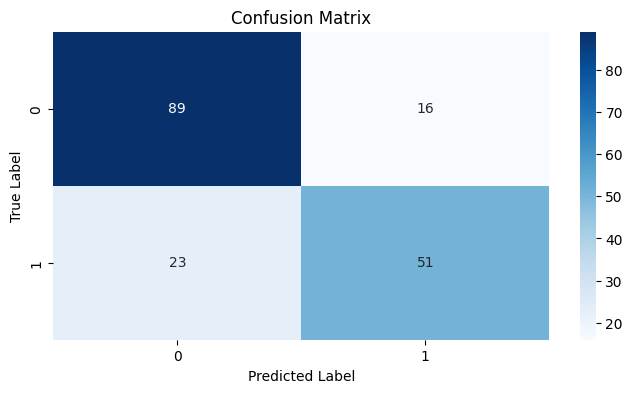

In [9]:
# Confussion Matrix
print("Generating confusion matrix...")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
print("Confusion matrix saved as 'confusion_matrix.png'")

### <h2><b>3.2. Gráfico Curva ROC</b></h2>


Generating ROC curve...
ROC curve saved as 'roc_curve.png'


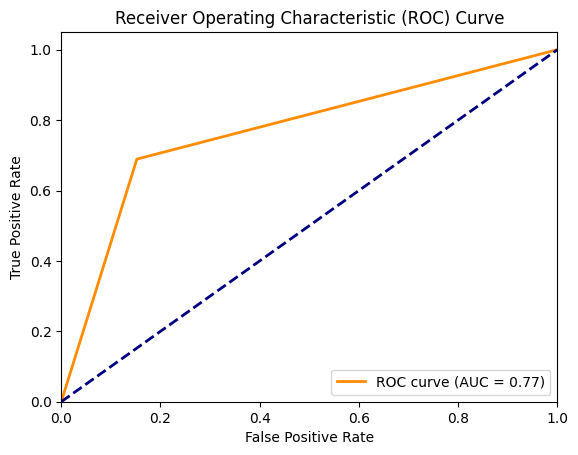

In [13]:
# ROC Curve
print("Generating ROC curve...")
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
print("ROC curve saved as 'roc_curve.png'")

## <h2><b>4. Evaluación Métricas</b></h2>

In [11]:
# Metrics calculation
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall (Sensitivity)": recall_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Specificity": recall_score(y_test, y_pred, pos_label=0),
    "F1 Score": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_pred),
    "R2_Score": r2_score(y_test, y_pred)
}

print("Model Metrics:")
for name, value in metrics.items():
    print(f"{name}: {value:.4f}")

Model Metrics:
Accuracy: 0.7821
Recall (Sensitivity): 0.6892
Precision: 0.7612
Specificity: 0.8476
F1 Score: 0.7234
AUC: 0.7684
R2_Score: 0.1015


## <h2><b>5. Guardado del modelo entrenado</b></h2>

### <h2><b>5.1. Guardado del modelo entrenado</b></h2>

In [12]:
# Saving Model
print("Saving model to 'knn_model_titanic.pkl'")
joblib.dump(model, 'knn_model_titanic.pkl')

print("Loading model from 'knn_model_titanic.pkl'")
loaded_model = joblib.load('knn_model_titanic.pkl')

Saving model to 'knn_model_titanic.pkl'
Loading model from 'knn_model_titanic.pkl'


### <h2><b>5.2. Validación del Modelo</b></h2>

In [14]:
# Validate loaded model
y_pred_loaded = loaded_model.predict(X_test)
acc_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Loaded model accuracy: {acc_loaded:.4f} (original: {metrics['Accuracy']:.4f})")

print("Script execution completed successfully")

Loaded model accuracy: 0.7821 (original: 0.7821)
Script execution completed successfully
